In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualisation of Prediction
### New Blade

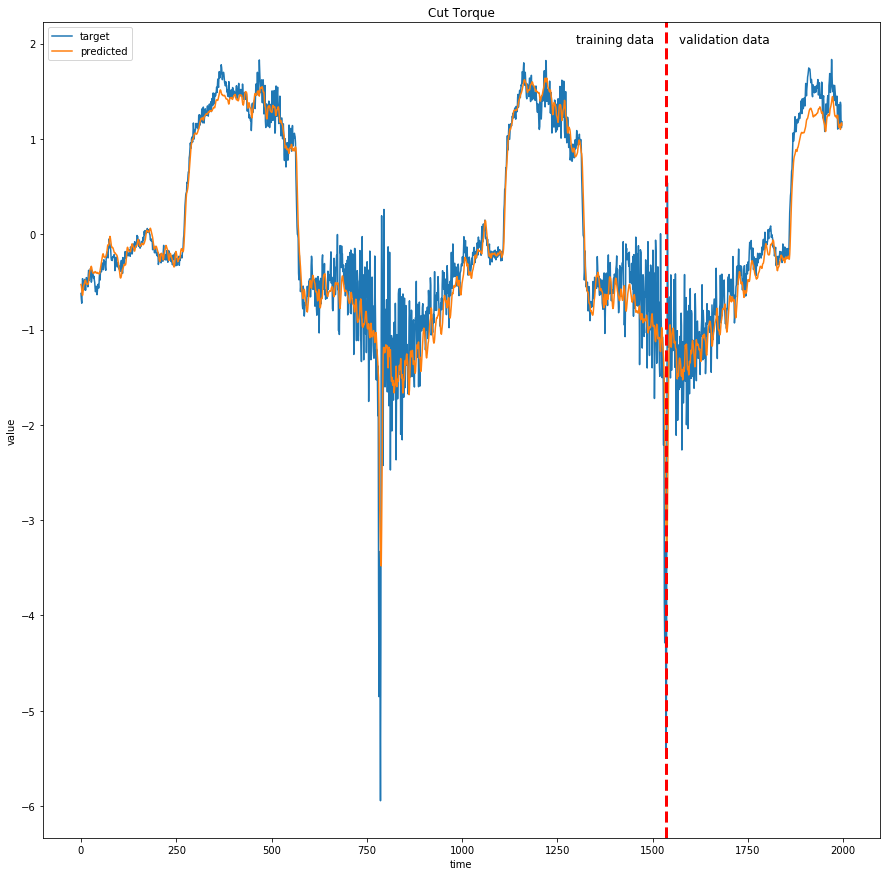

In [43]:
data_new_blade = pd.read_csv("./files/prediction_new_blade.csv", sep=";")
f, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_torque_target", ax=ax, label="target")
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_torque_predicted", ax=ax, label="predicted")
ax.axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
plt.text(1570, 2, 'validation data', fontsize=12)
plt.text(1300, 2, 'training data', fontsize=12)
ax.set(xlabel='time', ylabel='value')
ax.set(title="Cut Torque")
plt.show()

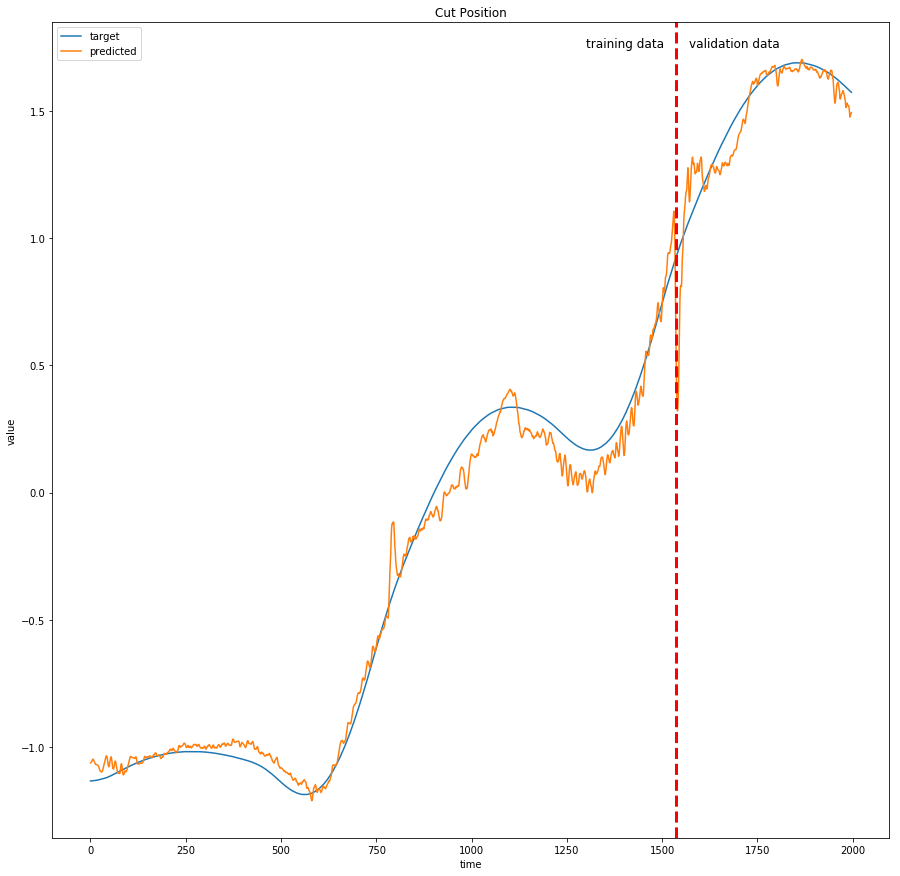

In [46]:
f, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_position_target", ax=ax, label="target")
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_position_predicted", ax=ax, label="predicted")
ax.axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
plt.text(1570, 1.75, 'validation data', fontsize=12)
plt.text(1300, 1.75, 'training data', fontsize=12)
ax.set(xlabel='time', ylabel='value')
ax.set(title="Cut Position")
plt.show()

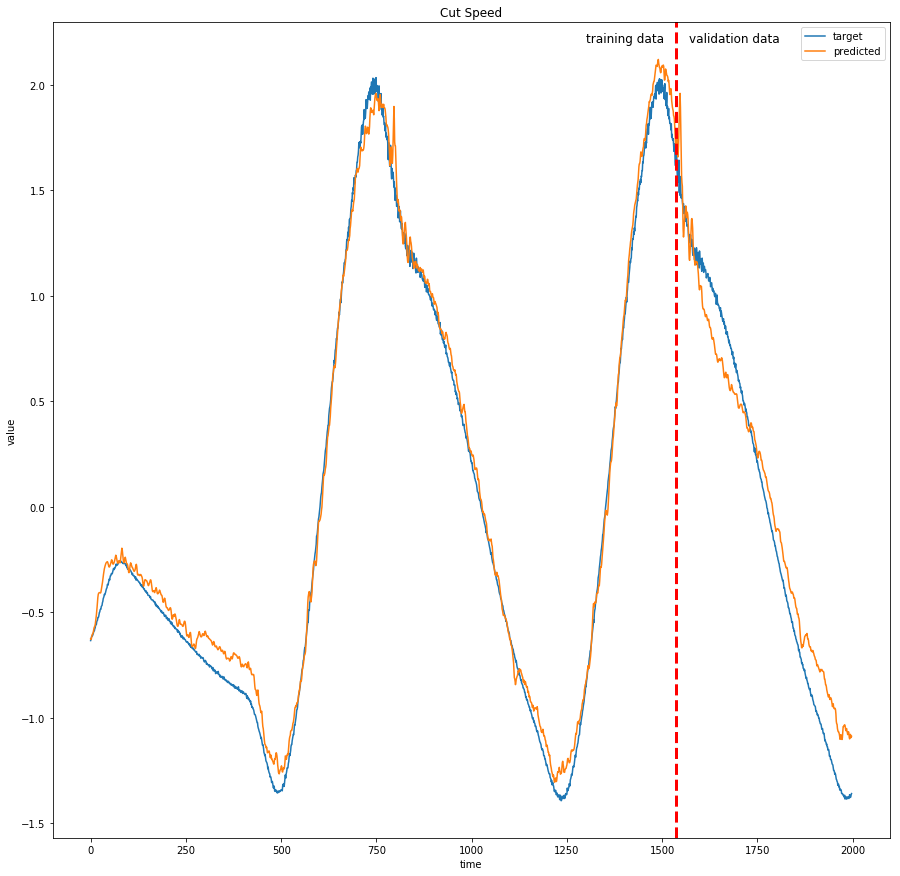

In [47]:
f, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_speed_target", ax=ax, label="target")
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_speed_predicted", ax=ax, label="predicted")
ax.axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
plt.text(1570, 2.2, 'validation data', fontsize=12)
plt.text(1300, 2.2, 'training data', fontsize=12)
ax.set(xlabel='time', ylabel='value')
ax.set(title="Cut Speed")
plt.show()

### Worn Blade

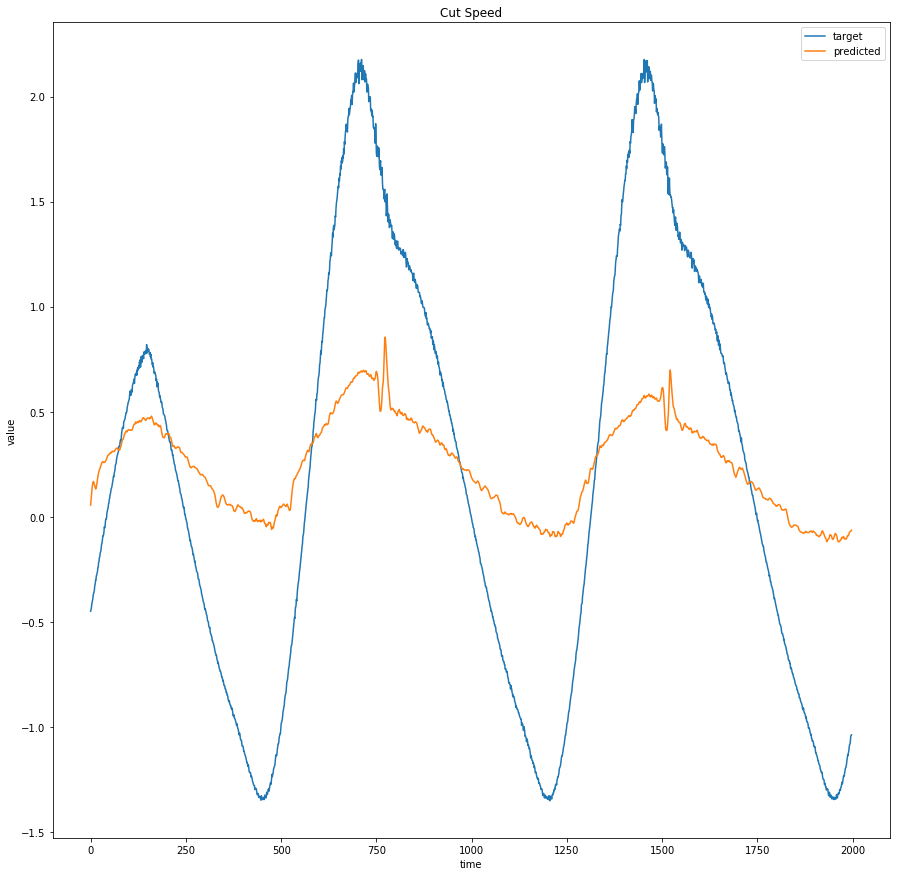

In [17]:
data_new_blade = pd.read_csv("./files/prediction_worn_blade.csv", sep=";")
f, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_speed_target", ax=ax, label="target")
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_speed_predicted", ax=ax, label="predicted")
ax.set(xlabel='time', ylabel='value')
ax.set(title="Cut Speed")
plt.show()